In [1]:
from keras import datasets, utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from path import Path
from tensorflow.python.client import device_lib

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Before starting check availability of GPU device.

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12588679803414664209, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1479858585
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3059886523523747824
 physical_device_desc: "device: 0, name: GeForce 840M, pci bus id: 0000:07:00.0, compute capability: 5.0"]

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load and preprocess the data

Names of each label from CIFAR-10 dataset

In [4]:
cifar_10_labels = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

Load dataset using keras.datasets

In [5]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

Show first picture from the train data (guess it is a frog).

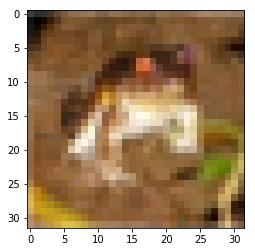

In [6]:
pylab.imshow(x_train[0])

In [7]:
print("Label of the image:", cifar_10_labels[y_train[0][0]])

Label of the image: Frog


Let's check shape of the image.

In [8]:
print(x_train[0].shape)

(32, 32, 3)


As we can see, the image is 3 dimenstional with height and width equal to 32. Each reflects RGB colormap.

Let's check the values of pixels.

In [9]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Values of pixels are numbers between 0 and 255. It would be better to normalize them and make them between 0 and 1.

In [10]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [11]:
x_train = x_train / 255
x_test = x_test / 255

Next, we should encode label values. For example: Frog - 6 should be [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [12]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [13]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


### Create the model

Create convolutional neural network which contatins convolutional, pooling, dropout and dense layers.
Dropout layer is used to avoid overfitting. It just ignores randomly selected outputs and make neural network learn harder without just memorizing training images.

In [14]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train[0].shape))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# add flatten layer to make one-dimensional layer with neurons
model.add(Flatten())

# classical dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Check the architecture of the network.

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

Compile the neural network.

In [16]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training and testing

Train neural network on training data using testing data as a validation set.

In [17]:
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 84s 2ms/step - loss: 1.5356 - acc: 0.4388 - val_loss: 1.1283 - val_acc: 0.6005
Epoch 2/30
50000/50000 [==============================] - 74s 1ms/step - loss: 1.1187 - acc: 0.6009 - val_loss: 1.0077 - val_acc: 0.6446
Epoch 3/30
50000/50000 [==============================] - 74s 1ms/step - loss: 0.9717 - acc: 0.6576 - val_loss: 0.8583 - val_acc: 0.6990
Epoch 4/30
50000/50000 [==============================] - 74s 1ms/step - loss: 0.8847 - acc: 0.6894 - val_loss: 0.7937 - val_acc: 0.7176
Epoch 5/30
50000/50000 [==============================] - 74s 1ms/step - loss: 0.8273 - acc: 0.7079 - val_loss: 0.7688 - val_acc: 0.7320
Epoch 6/30
50000/50000 [==============================] - 74s 1ms/step - loss: 0.7871 - acc: 0.7207 - val_loss: 0.7762 - val_acc: 0.7325
Epoch 7/30
50000/50000 [==============================] - 74s 1ms/step - loss: 0.7454 - acc: 0.7398 - val_loss: 0.7214 - val_acc

As we can see, validation accuracy after last epoch was about 78.5%. However, it was sometimes better before last iteration. What is interesting that validation accuracy had not increased much after 10-15 epochs.

Save structure and parameters of neural network. It is better to save structure and parameters separately because we may use same structure with different parameters to evaluate the performance of neural network.

In [18]:
model_structure = model.to_json()
f = Path('model_structure.json')
f.write_text(model_structure)

In [19]:
model.save_weights('model_weight.h5')